In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import datetime

In [2]:
# 경고메시지 무시
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 코로나 확진자 이동 경로 파일
df1 = pd.read_csv('./data/PatientRoute.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [4]:
df1.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
0,1000000001,2.0,2020-01-22,Gyeonggi-do,Gimpo-si,airport,37.615246,126.715632
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534


In [5]:
df1.shape

(8092, 8)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8092 entries, 0 to 8091
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  8092 non-null   int64  
 1   global_num  4828 non-null   float64
 2   date        8092 non-null   object 
 3   province    8092 non-null   object 
 4   city        8092 non-null   object 
 5   type        8092 non-null   object 
 6   latitude    8092 non-null   float64
 7   longitude   8092 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 505.9+ KB


In [7]:
# 서울 유동인구 파일
df2 = pd.read_csv('./data/SeoulFloating.csv', header='infer',encoding = 'latin1', na_values=[' '])

In [8]:
df2.head()

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-01,0,20,female,Seoul,Dobong-gu,19140
1,2020-01-01,0,20,male,Seoul,Dobong-gu,19950
2,2020-01-01,0,20,female,Seoul,Dongdaemun-gu,25450
3,2020-01-01,0,20,male,Seoul,Dongdaemun-gu,27050
4,2020-01-01,0,20,female,Seoul,Dongjag-gu,28880


In [9]:
df2.shape

(864000, 7)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864000 entries, 0 to 863999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        864000 non-null  object
 1   hour        864000 non-null  int64 
 2   birth_year  864000 non-null  int64 
 3   sex         864000 non-null  object
 4   province    864000 non-null  object
 5   city        864000 non-null  object
 6   fp_num      864000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 46.1+ MB


In [11]:
# 이동 경로 지역이 서울인 데이터만 추출
df1_seoul = df1[df1['province']=='Seoul']

In [12]:
df1_seoul.head()

,patient_id,global_num,date,province,city,type,latitude,longitude
1,1000000001,2.0,2020-01-24,Seoul,Jung-gu,hospital,37.567241,127.005659
2,1000000002,5.0,2020-01-25,Seoul,Seongbuk-gu,etc,37.592560,127.017048
3,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,store,37.591810,127.016822
4,1000000002,5.0,2020-01-26,Seoul,Seongdong-gu,public_transportation,37.563992,127.029534
5,1000000002,5.0,2020-01-26,Seoul,Seongbuk-gu,public_transportation,37.590330,127.015221


In [13]:
df1_seoul.shape

(3675, 8)

In [14]:
df1_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3675 entries, 1 to 8087
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  3675 non-null   int64  
 1   global_num  3581 non-null   float64
 2   date        3675 non-null   object 
 3   province    3675 non-null   object 
 4   city        3675 non-null   object 
 5   type        3675 non-null   object 
 6   latitude    3675 non-null   float64
 7   longitude   3675 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 258.4+ KB


In [15]:
# 서울 유동인구의 시작 날짜 조정(비교를 위해)
df2_date = df2[df2['date'] >= df1_seoul.iloc[0, 2]]

In [16]:
df2_date.head().reset_index(drop=True)

,date,hour,birth_year,sex,province,city,fp_num
0,2020-01-24,0,20,female,Seoul,Dobong-gu,20140
1,2020-01-24,0,20,male,Seoul,Dobong-gu,21410
2,2020-01-24,0,20,female,Seoul,Dongdaemun-gu,21900
3,2020-01-24,0,20,male,Seoul,Dongdaemun-gu,24230
4,2020-01-24,0,20,female,Seoul,Dongjag-gu,26230


In [17]:
df2_date.shape

(698400, 7)

In [18]:
df2_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698400 entries, 165600 to 863999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        698400 non-null  object
 1   hour        698400 non-null  int64 
 2   birth_year  698400 non-null  int64 
 3   sex         698400 non-null  object
 4   province    698400 non-null  object
 5   city        698400 non-null  object
 6   fp_num      698400 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 42.6+ MB


In [19]:
# 이동 경로가 서울인 데이터의 끝 날짜 조정(비교를 위해)
df1_seoul_date = df1_seoul[df1_seoul['date'] <= df2_date.iloc[-1,0]].sort_values(by=['date'], axis=0, ascending=True).reset_index(drop=True)

In [20]:
df1_seoul_date.tail()

,patient_id,global_num,date,province,city,type,latitude,longitude
2657,1000000638,10833.0,2020-04-30,Seoul,Jongno-gu,store,37.574279,126.989835
2658,1000000712,10995.0,2020-04-30,Seoul,Yeongdeungpo-gu,etc,37.539111,126.903394
2659,1000000638,10833.0,2020-04-30,Seoul,Jongno-gu,pc_cafe,37.572950,126.979358
2660,1000000713,11013.0,2020-04-30,Seoul,Yeongdeungpo-gu,etc,37.539111,126.903394
2661,1000000634,10771.0,2020-04-30,Seoul,Yangcheon-gu,hospital,37.511972,126.833222


In [21]:
df1_seoul_date.shape

(2662, 8)

In [22]:
df1_seoul_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2662 entries, 0 to 2661
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   patient_id  2662 non-null   int64  
 1   global_num  2574 non-null   float64
 2   date        2662 non-null   object 
 3   province    2662 non-null   object 
 4   city        2662 non-null   object 
 5   type        2662 non-null   object 
 6   latitude    2662 non-null   float64
 7   longitude   2662 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 166.5+ KB


In [23]:
# 이동경로가 서울인 데이터 프레임의 인덱스 조정(병합을 위해)
df1_seoul_date = df1_seoul_date.set_index(['province', 'city', 'date'])

In [24]:
df1_seoul_date.head()

patient_id  global_num      type   latitude  \
province city       date                                                      
Seoul    Gangnam-gu 2020-01-22  2000000001         3.0  hospital  37.524355   
         Yongsan-gu 2020-01-23  1400000003      1129.0       etc  37.536606   
         Gangnam-gu 2020-01-23  2000000001         3.0     store  37.527752   
         Jung-gu    2020-01-24  1000000001         2.0  hospital  37.567241   
         Jongno-gu  2020-01-24  1400000003      1129.0       etc  37.579617   

                                 longitude  
province city       date                    
Seoul    Gangnam-gu 2020-01-22  127.027948  
         Yongsan-gu 2020-01-23  126.977140  
         Gangnam-gu 2020-01-23  127.019480  
         Jung-gu    2020-01-24  127.005659  
         Jongno-gu  2020-01-24  126.977041

In [25]:
# 이동경로가 서울인 데이터 프레임에서 특정 열만 추출 그리고 인덱스 초기화
df1_seoul_date = df1_seoul_date[['patient_id', 'global_num']].reset_index()

In [26]:
df1_seoul_date.head()

,province,city,date,patient_id,global_num
0,Seoul,Gangnam-gu,2020-01-22,2000000001,3.0
1,Seoul,Yongsan-gu,2020-01-23,1400000003,1129.0
2,Seoul,Gangnam-gu,2020-01-23,2000000001,3.0
3,Seoul,Jung-gu,2020-01-24,1000000001,2.0
4,Seoul,Jongno-gu,2020-01-24,1400000003,1129.0


In [27]:
# 서울 특정 구의 해당 날짜의 유동인구의 평균을 구하기 위해 그룹핑, 그리고 필요한 열만 추출 후 인덱스 초기화
df2_date_groupby = df2_date.groupby(['province', 'city', 'date'])[['fp_num']].mean().reset_index()

In [28]:
df2_date_groupby.head()

,province,city,date,fp_num
0,Seoul,Dobong-gu,2020-01-24,21371.666667
1,Seoul,Dobong-gu,2020-01-25,21384.340278
2,Seoul,Dobong-gu,2020-01-26,21156.736111
3,Seoul,Dobong-gu,2020-01-27,21507.708333
4,Seoul,Dobong-gu,2020-01-28,19748.506944


In [29]:
# 이동 경로가 서울인 데이터 프레임과 서울 일일 유동인구 데이터 프레임 합침
df_merge = pd.merge(df1_seoul_date, df2_date_groupby)

In [30]:
df_merge.head()

,province,city,date,patient_id,global_num,fp_num
0,Seoul,Jung-gu,2020-01-24,1000000001,2.0,10391.215278
1,Seoul,Jongno-gu,2020-01-24,1400000003,1129.0,12305.798611
2,Seoul,Seongbuk-gu,2020-01-25,1000000002,5.0,26674.375000
3,Seoul,Yongsan-gu,2020-01-25,1400000003,1129.0,14381.493056
4,Seoul,Gangnam-gu,2020-01-25,2000000006,17.0,29110.763889


In [31]:
df_merge.shape

(2394, 6)

In [32]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2394 entries, 0 to 2393
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    2394 non-null   object 
 1   city        2394 non-null   object 
 2   date        2394 non-null   object 
 3   patient_id  2394 non-null   int64  
 4   global_num  2314 non-null   float64
 5   fp_num      2394 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 130.9+ KB


In [33]:
# 일일 확진자 수를 계산하기 위한 count
df_merge_copy = df_merge.copy()

In [34]:
df_merge_copy.shape

(2394, 6)

In [35]:
# 서울 일일 유동인구의 평균 구함
df_merge_groupby = df_merge.groupby('date')[['fp_num']].mean()

In [36]:
df_merge_groupby.head()

,fp_num
date,
2020-01-24,11348.506944
2020-01-25,22692.277778
2020-01-26,18719.583333
2020-01-27,25696.805556
2020-01-28,32301.276042


In [37]:
# 일일 확진자 수를 계산하여 count 열에 입력
df_merge_groupby['count'] = df_merge['date'].value_counts().sort_index()

In [38]:
df_merge_groupby = df_merge_groupby.reset_index()

In [50]:
df_merge_groupby.head()

,date,fp_num,count
0,2020-01-24,11348.506944,2
1,2020-01-25,22692.277778,5
2,2020-01-26,18719.583333,8
3,2020-01-27,25696.805556,2
4,2020-01-28,32301.276042,4


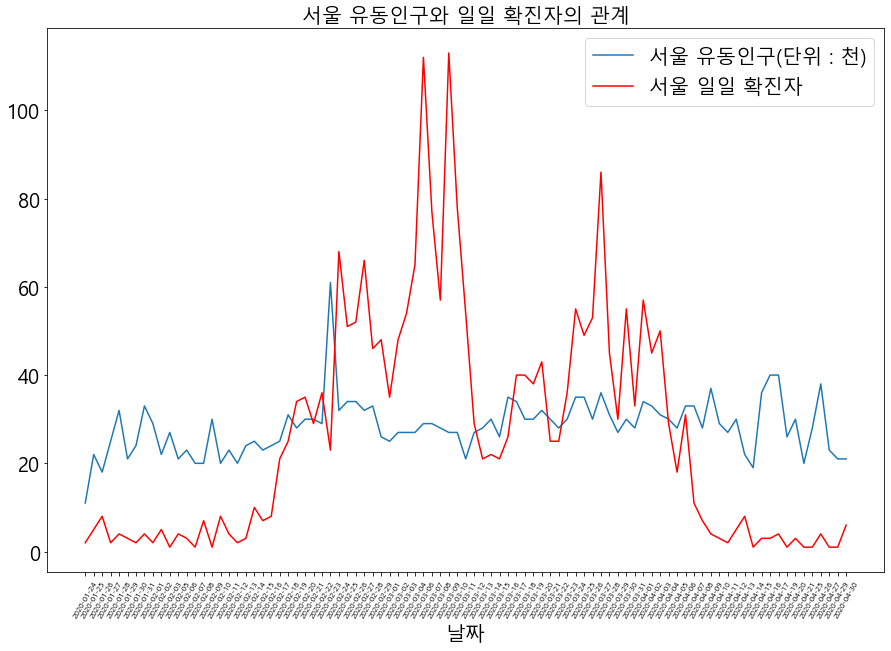

In [42]:
# 서울 유동인구와 일일 확진자의 관계(하나로 표현)
plt.figure(figsize=(15, 10))
plt.plot(df_merge_groupby['date'], df_merge_groupby['fp_num']//1000, label='서울 유동인구(단위 : 천)')
plt.plot(df_merge_groupby['date'], df_merge_groupby['count'], 'r-', label='서울 일일 확진자')
plt.xlabel('날짜', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()

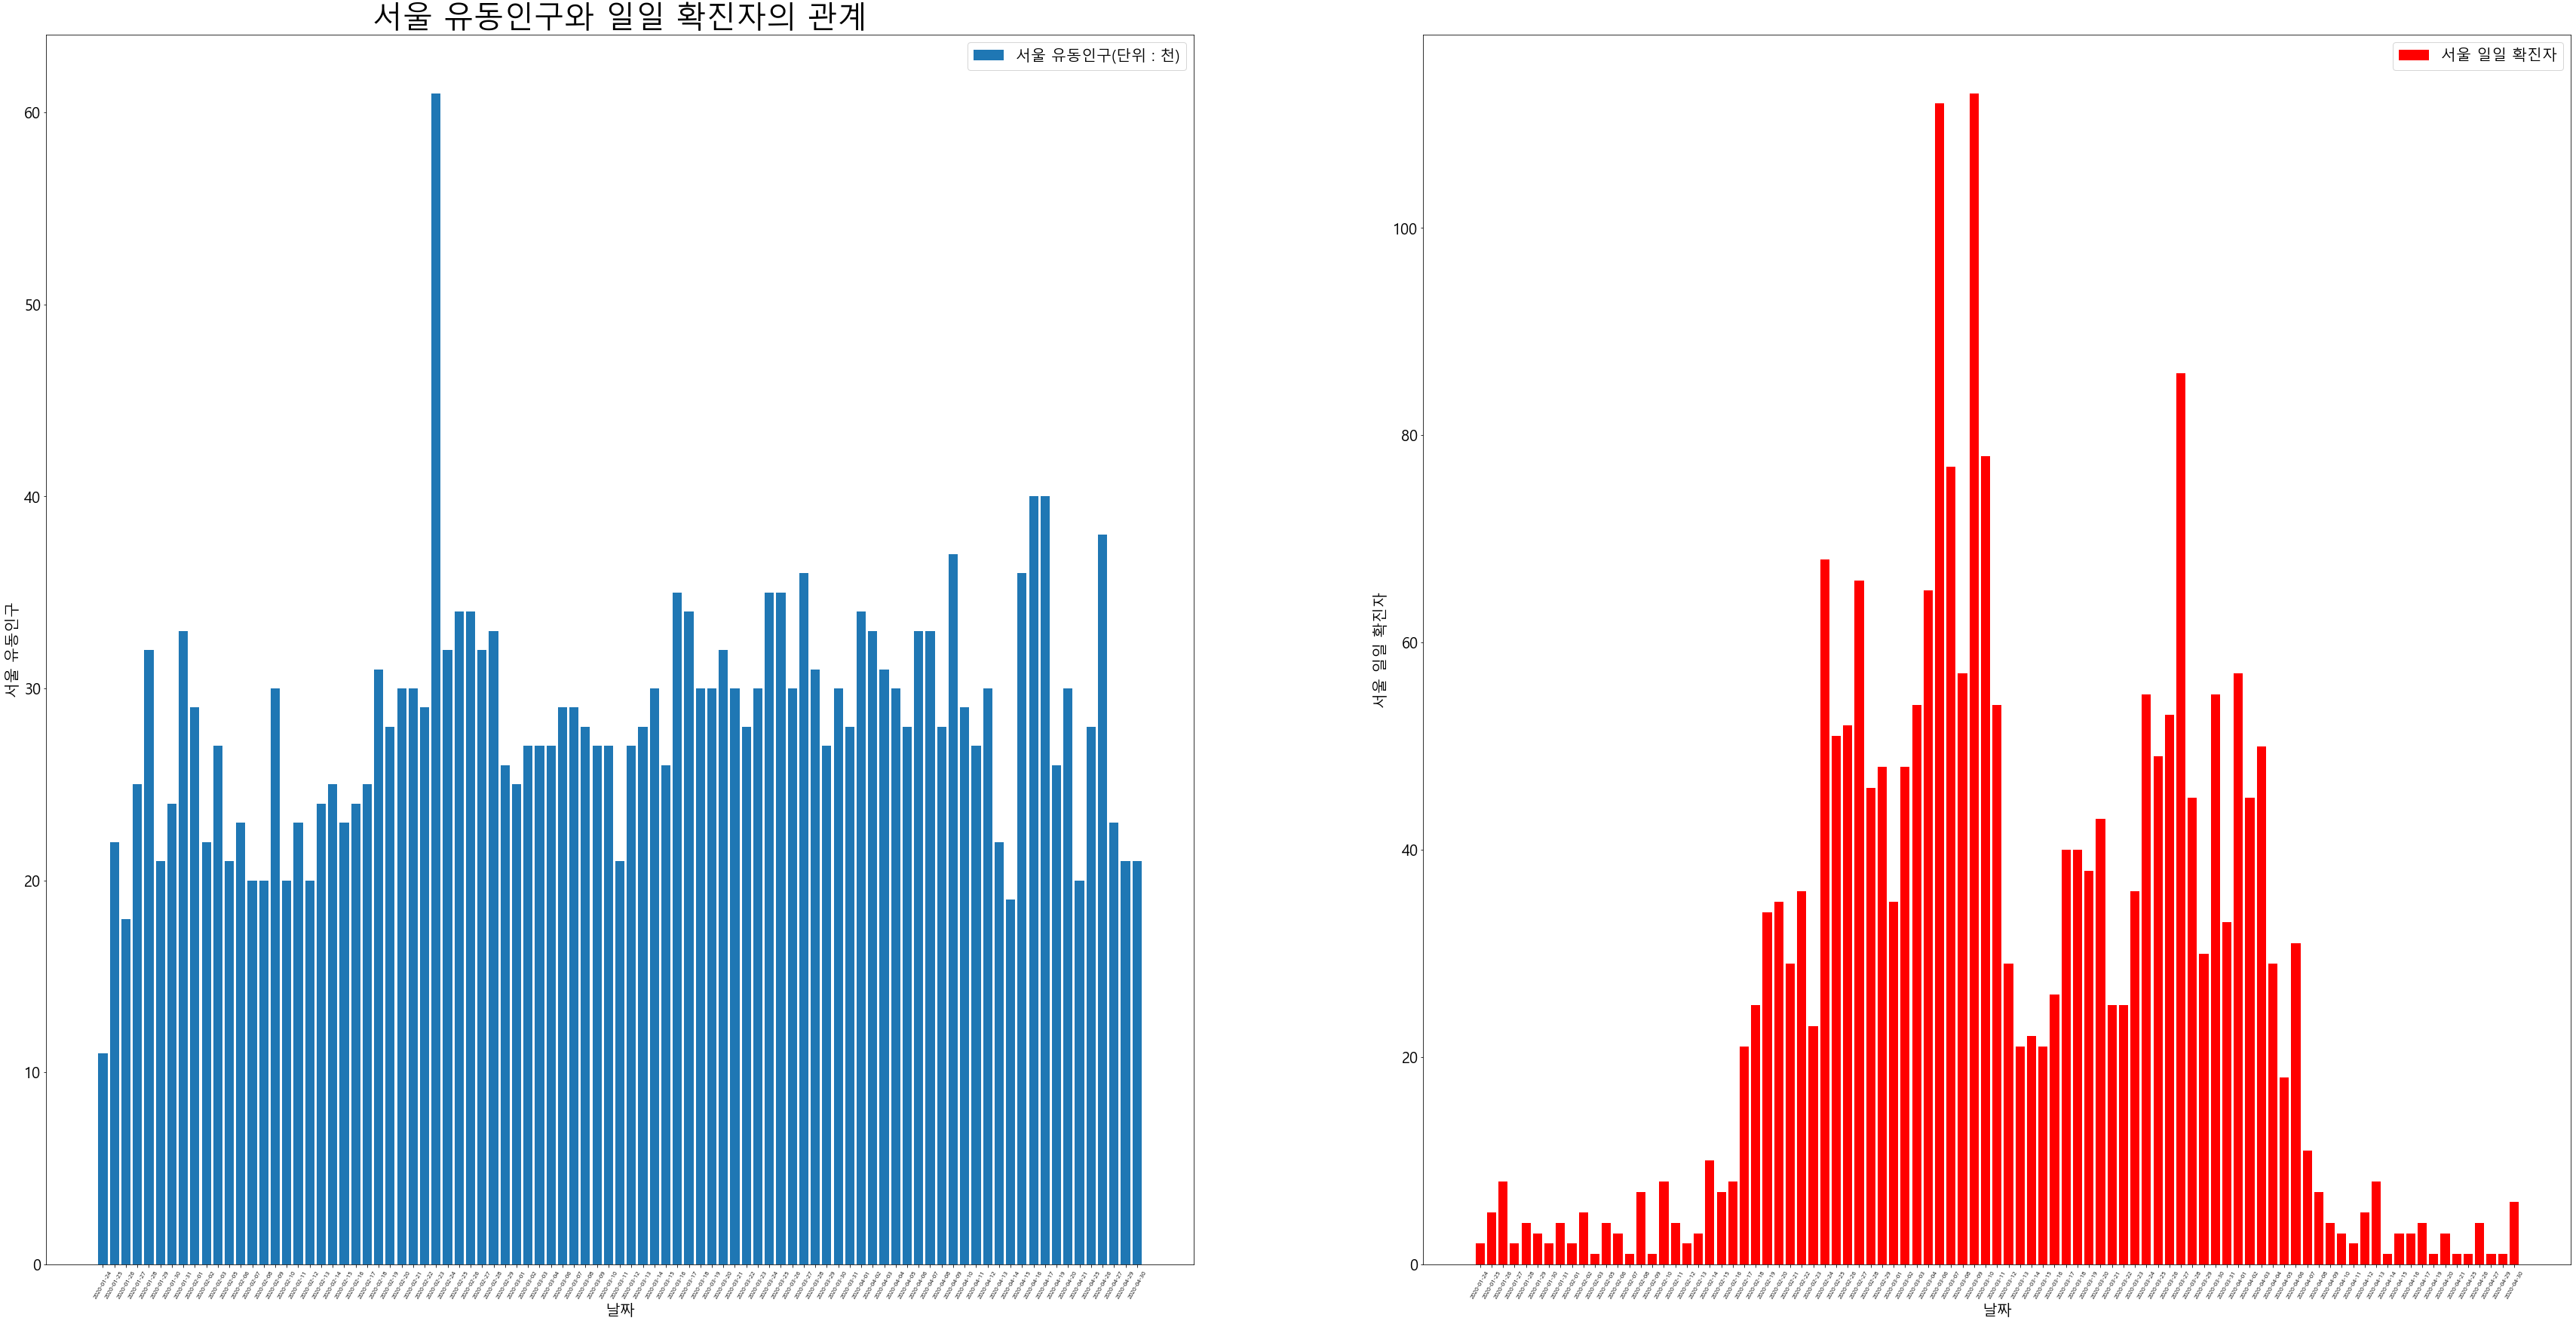

In [43]:
# 서울 유동인구와 일일 확진자의 관계(subplot)
plt.figure(figsize=(60, 30))
plt.subplot(1,2,1)
plt.bar(df_merge_groupby['date'], df_merge_groupby['fp_num']//1000, label='서울 유동인구(단위 : 천)')
plt.xlabel('날짜', fontsize=20)
plt.ylabel('서울 유동인구', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=40)
plt.legend(loc='upper right', fontsize=20)

plt.subplot(1,2,2)
plt.bar(df_merge_groupby['date'], df_merge_groupby['count'],label='서울 일일 확진자', color='red')
plt.xlabel('날짜', fontsize=20)
plt.ylabel('서울 일일 확진자', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.legend(loc='upper right', fontsize=20)
plt.show()

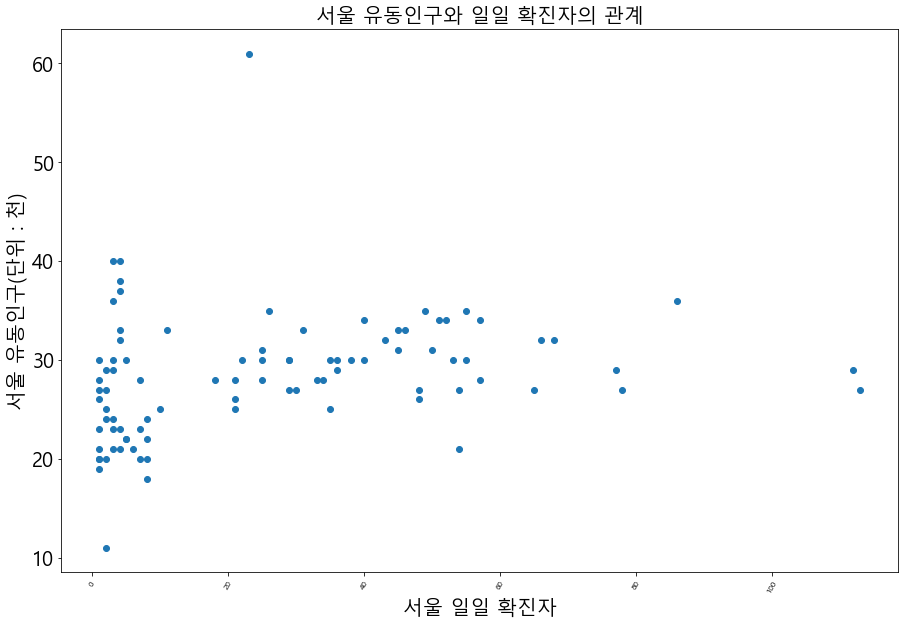

In [44]:
# 서울 유동인구와 일일 확진자의 관계 산점도(하나로 표현)
plt.figure(figsize=(15, 10))
plt.scatter(df_merge_groupby['count'], df_merge_groupby['fp_num']//1000)
plt.xlabel('서울 일일 확진자', fontsize=20)
plt.ylabel('서울 유동인구(단위 : 천)', fontsize=20)
plt.xticks(fontsize=8, rotation=60)
plt.yticks(fontsize=20)
plt.title('서울 유동인구와 일일 확진자의 관계', fontsize=20)
plt.show()

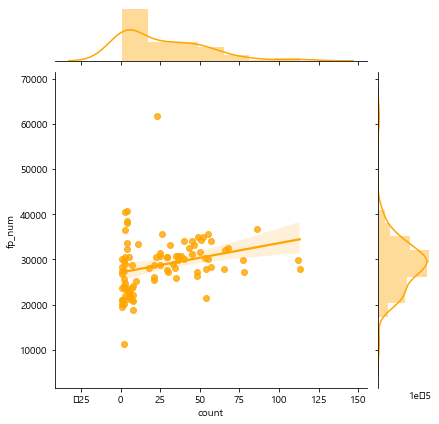

In [45]:
sns.jointplot(x='count',y='fp_num',data=df_merge_groupby,color='orange',kind='reg')
plt.show()

In [46]:
# 피어슨 상관계수
np.round(st.pearsonr(df_merge_groupby['count'],df_merge_groupby['fp_num']),3)           # 상관계수와 p-값.

array([0.268, 0.01 ])

In [47]:
# 스피어맨 상관계수
np.round(st.spearmanr(df_merge_groupby['count'],df_merge_groupby['fp_num']),3)  

array([0.406, 0.   ])

In [48]:
# 캔달 상관계수
np.round(st.kendalltau(df_merge_groupby['count'],df_merge_groupby['fp_num']),3)

array([0.285, 0.   ])

In [49]:
# 일일 확진자수와 유동인구 독립성 결정
stat, p_val, degFree, expected = st.chi2_contingency(df_merge_groupby[['count','fp_num']])    # 통계량, p-값, 자유도, 기대도수.
print("p_value : {}".format(np.round(p_val,3)))      

p_value : 0.0
